In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [21]:
big_array = np.arange(1_000_000)

%timeit [x * 2 for x in big_array]
%timeit big_array * 2

69.8 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
773 μs ± 65.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [30]:
df = pd.read_csv("../data/starter_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


In [35]:
df.describe()

summary = df.groupby("category", as_index=False)["value"].agg(["count","mean","std","min","max"])
display(summary)

,category,count,mean,std,min,max
0,A,4,11.500000,1.290994,10,13
1,B,3,15.666667,2.081666,14,18
2,C,3,27.666667,2.516611,25,30


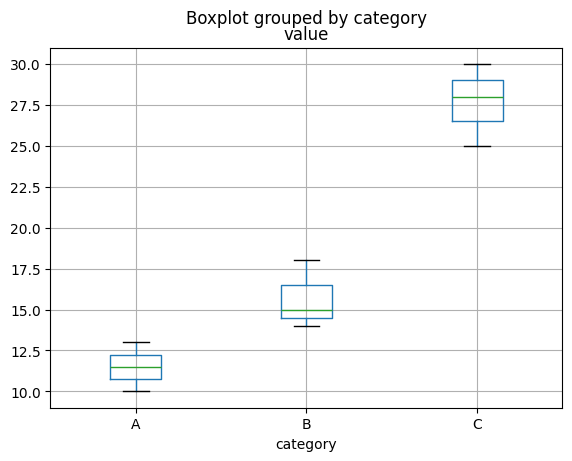

In [40]:
summary.to_csv("../data/processed/summary.csv", index=True)
boxplot = df.boxplot(column="value", by="category")
plt.savefig('../data/processed/boxplot.png')

In [42]:
import sys, os
sys.path.append(os.path.abspath("../src"))
from utils import get_summary_stats

get_summary_stats(df, "category", "value")

,category,count,mean,std,min,max
0,A,4,11.500000,1.290994,10,13
1,B,3,15.666667,2.081666,14,18
2,C,3,27.666667,2.516611,25,30
